# $t$-SNE plot

In [12]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [2]:
plt.style.use("../presentation.mplstyle")

In [3]:
data = pd.read_csv("/mnt/data/data/features/final_features.csv")

In [5]:
data_interaction = data[data["label"]]
phage_embedding_size = 3863
X = data_interaction.iloc[:,3:phage_embedding_size]

In [ ]:

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)

X_embedded.shape

(378, 2)

In [29]:
x, y = X_embedded.T

In [30]:
levels, categories = pd.factorize(data_interaction['bacteria_id'])

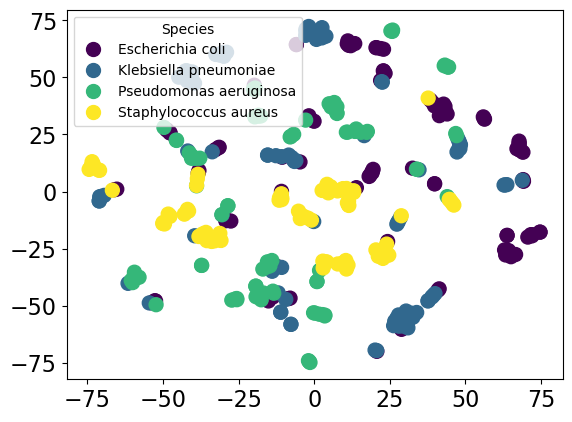

In [18]:
scatter = plt.scatter(x, y, c=levels)
plt.legend(scatter.legend_elements()[0], categories, title="Species")


## UMAP

In [8]:
reducer = umap.UMAP()
X_embedded = reducer.fit_transform(X)
X_embedded.shape

/home/d4gen/.local/share/miniforge3/envs/smartamrX/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(378, 2)

In [9]:
x, y = X_embedded.T

In [10]:
levels, categories = pd.factorize(data_interaction['bacteria_id'])

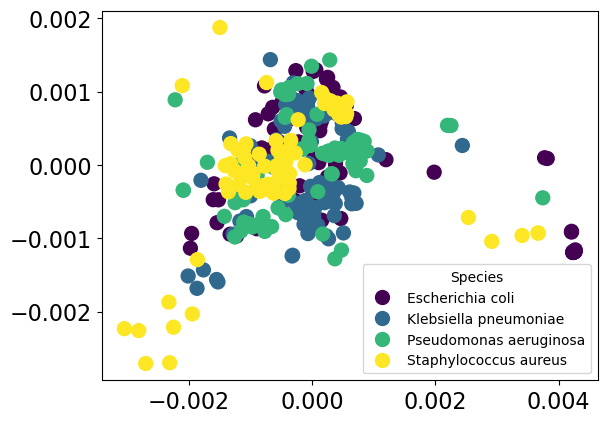

In [31]:
scatter = plt.scatter(x, y, c=levels)
plt.legend(scatter.legend_elements()[0], categories, title="Species")


## PCA

In [32]:
X_embedded = PCA(n_components=2).fit_transform(X)


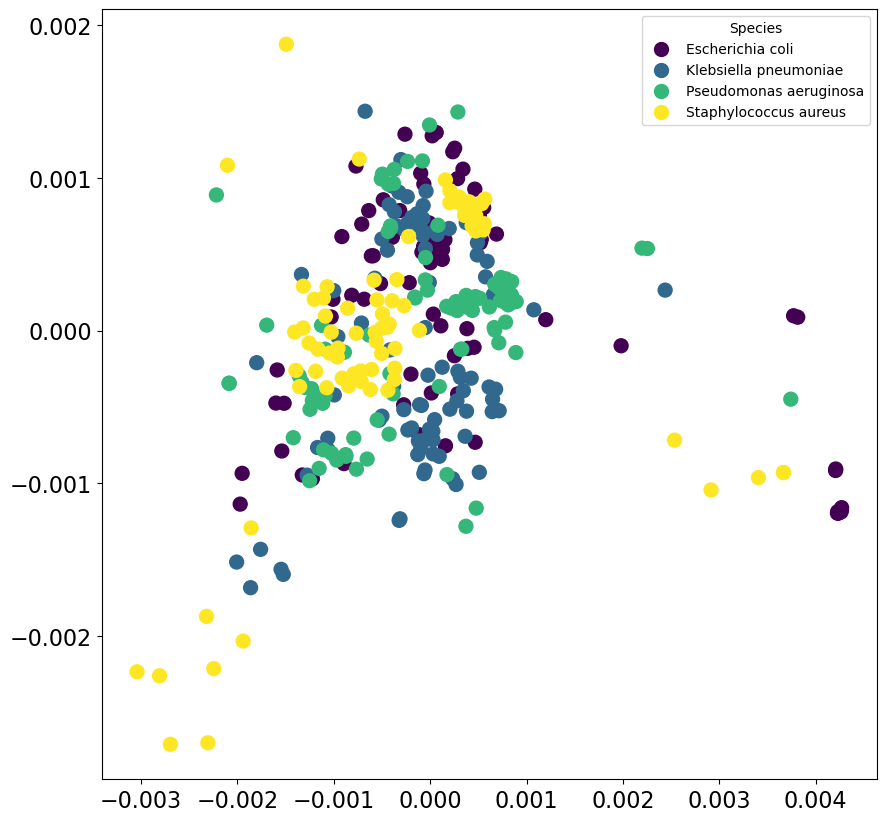

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
x, y = X_embedded.T
levels, categories = pd.factorize(data_interaction['bacteria_id'])
ax.scatter(x, y, c=levels)
plt.legend(scatter.legend_elements()[0], categories, title="Species")


In [37]:

X_embedded = PCA(n_components=3).fit_transform(X)

X_embedded.shape


(378, 3)

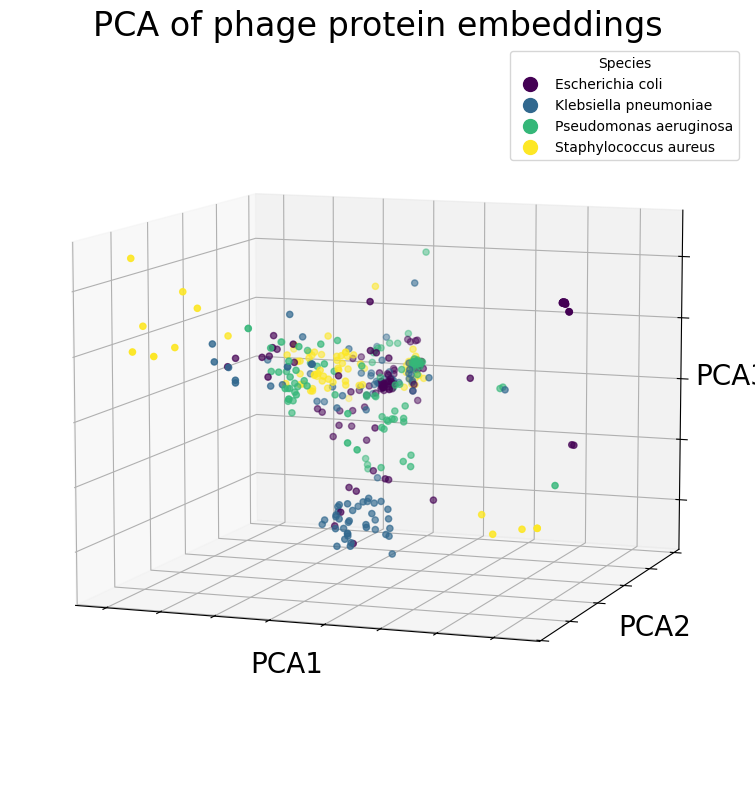

In [63]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
x, y, z = X_embedded.T
levels, categories = pd.factorize(data_interaction['bacteria_id'])
ax.scatter(x, y, z, c=levels)
ax.view_init(azim=-70, elev=9)
plt.legend(scatter.legend_elements()[0], categories, title="Species")
plt.title("PCA of phage protein embeddings")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.tight_layout()